In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('data/ExploreBlue feedback.csv')
# Convenience renaming
df.rename(columns={'Please evaluate the response on a simple rating scheme.  5=amazing, 3=useful, 1=useless': 'rating', 'Your role ': 'role'}, inplace=True)
# Goodbye Gus
df.drop(df[df['Your name'] == 'Gus'].index, inplace=True)
# Remove when bot website was broken
df.drop(df.index[1], inplace=True)
df.head()

,Timestamp,Username,Your name,role,What did you ask the bot? (What was your prompt?) Please cut and paste here.,What was the bot's response? Please cut and paste here.,rating,Please explain your rating above.,Anything else you'd like to share?
0,2025/03/05 1:41:28 PM AST,acozad@umich.edu,Alyssa Cozad,Adviser,I am interested in the impact of the aids cris...,"HS 225 (Cross-listed as WGS 212, WOMENSTD 212)...",4,I was very pleased with the range of courses g...,NaN
2,2025/03/10 10:49:13 AM AST,maiziem@umich.edu,Maizie Jones,Adviser,I want to learn about food around the world,Recommended Courses\nURP 527: Foundations of S...,4,This is a great starting place for students wh...,Here are some thoughts to improve this tool (u...
3,2025/03/11 10:37:04 AM AST,baileed@umich.edu,Bailee Duke,Student,I'm interested in addressing climate change th...,CEE 366: Environmental Engineering Laboratory\...,4,I think it will be helpful for first and secon...,NaN
4,2025/03/12 11:43:37 AM AST,nixonn@umich.edu,Nikye Nixon,Student,I am interested in learning about video game ...,Recommended Courses\nEECS 494: Computer Game D...,5,I asked the bot about my own interests that I ...,This tool is really cool! I think it'd be even...
5,2025/03/13 9:43:24 AM AST,kayfry@umich.edu,Kaydee Szust,Staff,forensics,"Recommended Courses\nECON 427: Crime, Economic...",3,"I gave a relatively vague, unclear prompt with...",This is really cool!


In [7]:
df

,Timestamp,Username,Your name,role,What did you ask the bot? (What was your prompt?) Please cut and paste here.,What was the bot's response? Please cut and paste here.,rating,Please explain your rating above.,Anything else you'd like to share?
0,2025/03/05 1:41:28 PM AST,acozad@umich.edu,Alyssa Cozad,Adviser,I am interested in the impact of the aids cris...,"HS 225 (Cross-listed as WGS 212, WOMENSTD 212)...",4,I was very pleased with the range of courses g...,NaN
2,2025/03/10 10:49:13 AM AST,maiziem@umich.edu,Maizie Jones,Adviser,I want to learn about food around the world,Recommended Courses\nURP 527: Foundations of S...,4,This is a great starting place for students wh...,Here are some thoughts to improve this tool (u...
3,2025/03/11 10:37:04 AM AST,baileed@umich.edu,Bailee Duke,Student,I'm interested in addressing climate change th...,CEE 366: Environmental Engineering Laboratory\...,4,I think it will be helpful for first and secon...,NaN
4,2025/03/12 11:43:37 AM AST,nixonn@umich.edu,Nikye Nixon,Student,I am interested in learning about video game ...,Recommended Courses\nEECS 494: Computer Game D...,5,I asked the bot about my own interests that I ...,This tool is really cool! I think it'd be even...
5,2025/03/13 9:43:24 AM AST,kayfry@umich.edu,Kaydee Szust,Staff,forensics,"Recommended Courses\nECON 427: Crime, Economic...",3,"I gave a relatively vague, unclear prompt with...",This is really cool!
6,2025/03/14 9:30:07 AM AST,mairah@umich.edu,Maisha Rahman,Student,What are the most interesting classes for IOE ...,IOE 473: Advanced Data Analytics\nRationale: T...,3,Some of the class recommendations were good bu...,NaN
7,2025/03/19 7:46:54 PM AST,starrja@umich.edu,Jamison Starr,Student,I am interested in mathematically based classe...,Recommended Courses\n\nAEROSP 550 (Cross-liste...,5,I was expecting only complex systems classes b...,NaN
8,2025/03/20 11:05:28 AM AST,kmream@umich.edu,Katie Ream,Student,My prompt was just asking about 100 and 200 le...,ASIANLAN 229: Intensive Japanese II\nRationale...,5,Of course computation speed is something that ...,I think this tool would be super helpful when ...
9,2025/03/20 11:35:19 AM AST,evanroot@umich.edu,Evan Rootness,Student,I'm interested in a class about impressionist ...,Recommended Courses\n\nFRENCH 241: Origins of ...,4,I liked that I got two high confidence courses...,NaN
10,2025/03/24 1:08:43 PM AST,tmheim@umich.edu,Tristan Heim,Student,I am interested in learning about how AI conne...,Recommended Courses\nACC 565: Accounting Analy...,5,The connection between accounting and AI is mu...,NaN


51
31
20


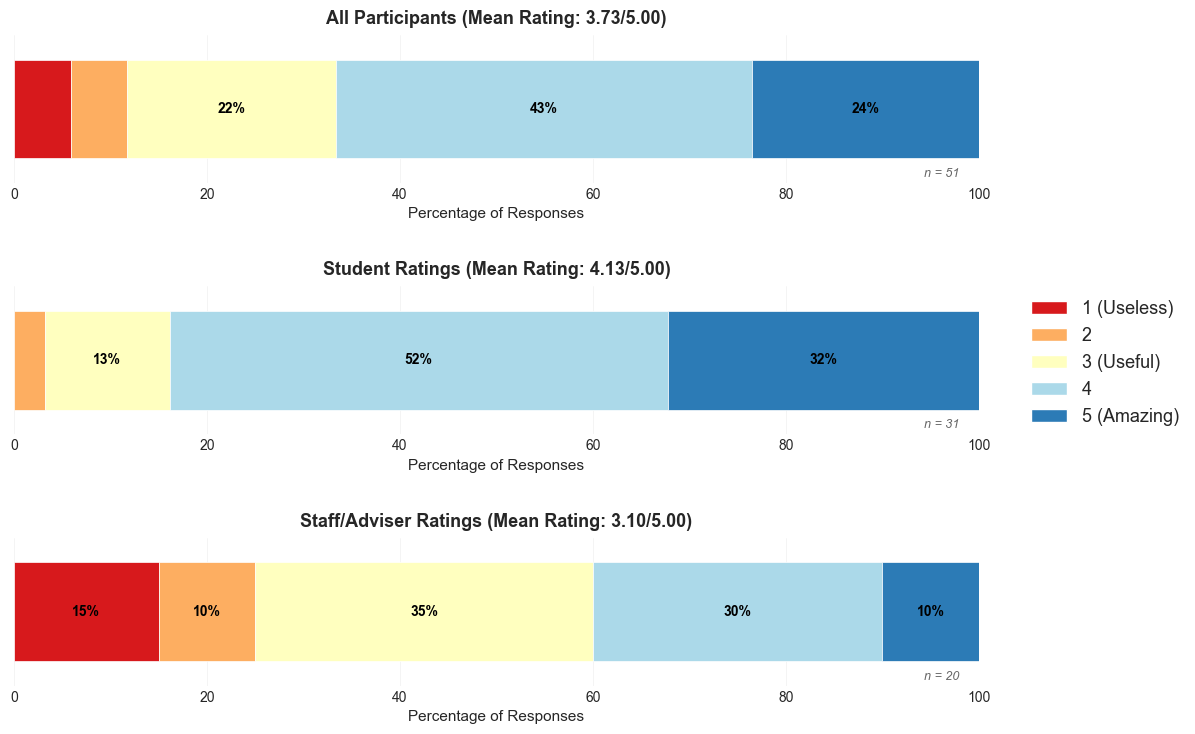


COURSE RECOMMENDER EVALUATION SUMMARY

OVERALL:
  Sample Size: 51
  Mean Rating: 3.73/5.00
  Std Deviation: 1.07
  Satisfaction Rate (4-5): 66.7%
  Distribution:
    1:  3 responses ( 5.9%)
    2:  3 responses ( 5.9%)
    3: 11 responses (21.6%)
    4: 22 responses (43.1%)
    5: 12 responses (23.5%)

STUDENTS:
  Sample Size: 31
  Mean Rating: 4.13/5.00
  Std Deviation: 0.75
  Satisfaction Rate (4-5): 83.9%
  Distribution:
    1:  0 responses ( 0.0%)
    2:  1 responses ( 3.2%)
    3:  4 responses (12.9%)
    4: 16 responses (51.6%)
    5: 10 responses (32.3%)

STAFF/ADVISERS:
  Sample Size: 20
  Mean Rating: 3.10/5.00
  Std Deviation: 1.18
  Satisfaction Rate (4-5): 40.0%
  Distribution:
    1:  3 responses (15.0%)
    2:  2 responses (10.0%)
    3:  7 responses (35.0%)
    4:  6 responses (30.0%)
    5:  2 responses (10.0%)



In [10]:

plt.style.use('seaborn-v0_8-whitegrid')

# Clean the data
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating', 'role'])

def create_clean_rating_plot(data, title, ax):
    """Create a clean horizontal stacked bar chart"""
    
    # Count ratings and calculate percentages
    rating_counts = Counter(data['rating'])
    total_responses = len(data)
    print(total_responses)
    
    ratings = [1, 2, 3, 4, 5]
    counts = [rating_counts.get(i, 0) for i in ratings]
    percentages = [count/total_responses * 100 for count in counts]
    
    # Clean, professional color scheme (diverging)
    colors = ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']
    
    # Create the stacked bar
    left = 0
    bars = []
    for i, (rating, pct, color) in enumerate(zip(ratings, percentages, colors)):
        if pct > 0:
            bar = ax.barh(0, pct, left=left, color=color, 
                         edgecolor='white', linewidth=0.5, height=0.4)
            bars.append(bar)
            
            # Only add text labels for segments > 8% to avoid clutter
            if pct > 8:
                ax.text(left + pct/2, 0, f'{pct:.0f}%', 
                       ha='center', va='center', fontsize=10, 
                       fontweight='bold', color='black')
            
            left += pct
    
    # Clean formatting
    ax.set_xlim(0, 100)
    ax.set_ylim(-0.3, 0.3)
    ax.set_xlabel('Percentage of Responses', fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold', pad=8)
    ax.set_yticks([])
    
    # Remove unnecessary spines
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Add subtle grid
    ax.grid(axis='x', alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    
    # Add sample size annotation
    ax.text(0.98, 0.02, f'n = {total_responses}', 
            transform=ax.transAxes, fontsize=9, 
            ha='right', va='bottom', style='italic', alpha=0.7)
    
    return bars

# Create figure with better proportions
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

# Create plots
bars1 = create_clean_rating_plot(df, 'All Participants (Mean Rating: 3.73/5.00)', axes[0])

students_df = df[df['role'] == 'Student']
bars2 = create_clean_rating_plot(students_df, 'Student Ratings (Mean Rating: 4.13/5.00)', axes[1])

others_df = df[df['role'] != 'Student']
bars3 = create_clean_rating_plot(others_df, 'Staff/Adviser Ratings (Mean Rating: 3.10/5.00)', axes[2])

# Create a clean legend
rating_labels = ['1 (Useless)', '2', '3 (Useful)', '4', '5 (Amazing)']
colors = ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']

# Add legend outside the plot area
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='white') 
                  for color in colors]
fig.legend(legend_elements, rating_labels, 
          loc='center right', bbox_to_anchor=(1, 0.47),
          frameon=False, fontsize=13)

# Adjust layout for clean spacing
plt.tight_layout()
plt.subplots_adjust(right=0.82, top=0.88, hspace=0.7)

# Show plot
plt.show()

# Print clean summary
print("\n" + "="*60)
print("COURSE RECOMMENDER EVALUATION SUMMARY")
print("="*60)

def print_clean_stats(data, group_name):
    ratings = data['rating'].values
    mean_rating = np.mean(ratings)
    
    print(f"\n{group_name.upper()}:")
    print(f"  Sample Size: {len(ratings)}")
    print(f"  Mean Rating: {mean_rating:.2f}/5.00")
    print(f"  Std Deviation: {np.std(ratings):.2f}")
    
    # Satisfaction metrics
    satisfied = len(ratings[ratings >= 4])
    satisfaction_rate = satisfied / len(ratings) * 100
    print(f"  Satisfaction Rate (4-5): {satisfaction_rate:.1f}%")
    
    # Distribution
    rating_dist = Counter(ratings)
    print("  Distribution:")
    for i in range(1, 6):
        count = rating_dist.get(i, 0)
        pct = count/len(ratings) * 100
        print(f"    {i}: {count:2d} responses ({pct:4.1f}%)")

print_clean_stats(df, "Overall")
print_clean_stats(students_df, "Students") 
print_clean_stats(others_df, "Staff/Advisers")

print("\n" + "="*60)